## KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importamos los datos originales y agregamos el label

In [2]:
df_train_values = pd.read_csv('./../datasets/train_values.csv')
df_train_labels = pd.read_csv('./../datasets/train_labels.csv')

### Pre-prosesamiento de datos

In [3]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
#Selección de features
KNN_train = df_train_values.iloc[:,:4]

In [5]:
KNN_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   building_id     260601 non-null  int64
 1   geo_level_1_id  260601 non-null  int64
 2   geo_level_2_id  260601 non-null  int64
 3   geo_level_3_id  260601 non-null  int64
dtypes: int64(4)
memory usage: 8.0 MB


In [6]:
# Agregamos labels
KNN_train = KNN_train.merge(df_train_labels)

# Quitamos el feature 'building_id'
KNN_train = KNN_train.iloc[:,1:]

In [7]:
KNN_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   geo_level_1_id  260601 non-null  int64
 1   geo_level_2_id  260601 non-null  int64
 2   geo_level_3_id  260601 non-null  int64
 3   damage_grade    260601 non-null  int64
dtypes: int64(4)
memory usage: 9.9 MB


In [8]:
X = KNN_train.iloc[:, :-1].values
y = KNN_train.iloc[:, -1].values

#### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 2095  2605   340]
 [ 1922 23371  4372]
 [  428  6679 10309]]
              precision    recall  f1-score   support

           1       0.47      0.42      0.44      5040
           2       0.72      0.79      0.75     29665
           3       0.69      0.59      0.64     17416

    accuracy                           0.69     52121
   macro avg       0.62      0.60      0.61     52121
weighted avg       0.68      0.69      0.68     52121

0.6863836073751463


#### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

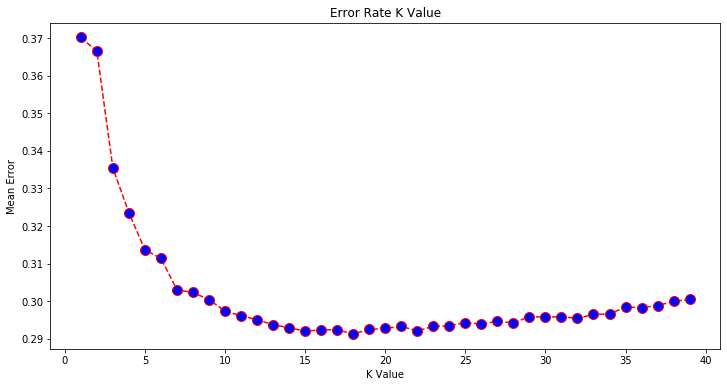

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### Training and Predictions con K=18

In [16]:
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [17]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1788  2896   356]
 [ 1174 25017  3474]
 [  257  7022 10137]]
              precision    recall  f1-score   support

           1       0.56      0.35      0.43      5040
           2       0.72      0.84      0.77     29665
           3       0.73      0.58      0.65     17416

    accuracy                           0.71     52121
   macro avg       0.67      0.59      0.62     52121
weighted avg       0.70      0.71      0.70     52121

0.7087738147771532


### Competencia: Predict and Submit

In [19]:
test_values = pd.read_csv('./../datasets/test_values.csv')

#### Pre_procesamiento del set de test (competencia)

In [20]:
#Selección de features
test_values = test_values.iloc[:,:4]
# Quitamos el feature 'building_id'
test_values = test_values.iloc[:,1:]

In [21]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   geo_level_1_id  86868 non-null  int64
 1   geo_level_2_id  86868 non-null  int64
 2   geo_level_3_id  86868 non-null  int64
dtypes: int64(3)
memory usage: 2.0 MB


In [22]:
y_pred = classifier.predict(test_values)

In [23]:
submission_format = pd.read_csv('./../datasets/submission_format.csv', index_col='building_id')

In [24]:
our_submission = pd.DataFrame(data=y_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [25]:
our_submission.head(2)

,damage_grade
building_id,
300051,1
99355,1


In [26]:
our_submission.to_csv('submission.csv')

In [27]:
!head submission.csv

building_id,damage_grade
300051,1
99355,1
890251,2
745817,2
421793,1
871976,2
691228,2
896100,2
343471,2


#### Resultado Submit muy bajo (overfiting)

### Prueba diferentes features

#### KNN - FE1

In [28]:
#Realizamos One-Hot Encoding de los datos de tipo category y object
KNN_train = pd.get_dummies(df_train_values)
KNN_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   has_superstructure_adobe_mud            260601 non-null  int64
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64
 10  has_superstructure_stone_flag           260601 non-null  int64
 11  

In [29]:
#Seleccionamos los features
selected_features = ['building_id',
                      'geo_level_1_id',
                       'geo_level_2_id',
#                       'geo_level_3_id',
                       'age',
                       'area_percentage',
                       'height_percentage',
                       'has_superstructure_cement_mortar_stone']
    #                   'foundation_type_r']
#                       'ground_floor_type_v',
 #                      'count_floors_pre_eq',
  #                     'has_superstructure_mud_mortar_brick',
   #                    'roof_type_x',
    #                   'count_families',
     #                  'foundation_type_i',
      #                 'has_superstructure_timber'   ]



KNN_train_subset = KNN_train[selected_features]

In [30]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   age                                     260601 non-null  int64
 4   area_percentage                         260601 non-null  int64
 5   height_percentage                       260601 non-null  int64
 6   has_superstructure_cement_mortar_stone  260601 non-null  int64
dtypes: int64(7)
memory usage: 13.9 MB


In [31]:
# Agregamos labels
KNN_train_subset = KNN_train_subset.merge(df_train_labels)

# Quitamos el feature 'building_id'
KNN_train_subset = KNN_train_subset.iloc[:,1:]

In [32]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   age                                     260601 non-null  int64
 3   area_percentage                         260601 non-null  int64
 4   height_percentage                       260601 non-null  int64
 5   has_superstructure_cement_mortar_stone  260601 non-null  int64
 6   damage_grade                            260601 non-null  int64
dtypes: int64(7)
memory usage: 15.9 MB


In [33]:
X = KNN_train_subset.iloc[:, :-1].values
y = KNN_train_subset.iloc[:, -1].values

#### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1930  2799   302]
 [ 2104 22027  5417]
 [  470  7586  9486]]
              precision    recall  f1-score   support

           1       0.43      0.38      0.40      5031
           2       0.68      0.75      0.71     29548
           3       0.62      0.54      0.58     17542

    accuracy                           0.64     52121
   macro avg       0.58      0.56      0.57     52121
weighted avg       0.64      0.64      0.64     52121

0.641641564820322


#### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

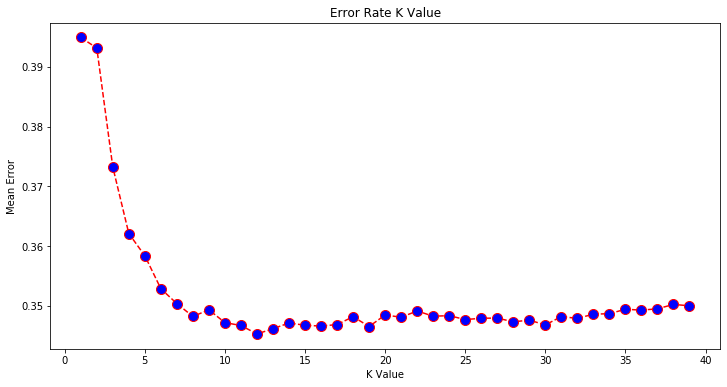

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### Training and Predictions con K=12

In [41]:
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [42]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1622  3112   297]
 [ 1423 23896  4229]
 [  257  8677  8608]]
              precision    recall  f1-score   support

           1       0.49      0.32      0.39      5031
           2       0.67      0.81      0.73     29548
           3       0.66      0.49      0.56     17542

    accuracy                           0.65     52121
   macro avg       0.61      0.54      0.56     52121
weighted avg       0.65      0.65      0.64     52121

0.6547456879184973


#### KNN - FE2

In [44]:
#Realizamos One-Hot Encoding de los datos de tipo category y object
KNN_train = pd.get_dummies(df_train_values)
KNN_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   has_superstructure_adobe_mud            260601 non-null  int64
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64
 10  has_superstructure_stone_flag           260601 non-null  int64
 11  

In [45]:
#Seleccionamos los features
selected_features = ['building_id',
                      'geo_level_1_id',
#                       'geo_level_2_id',
#                       'geo_level_3_id',
                       'age',
                       'area_percentage',
                       'height_percentage',
                       'has_superstructure_cement_mortar_stone',
                       'foundation_type_r',
                       'ground_floor_type_v',
                       'count_floors_pre_eq',
                       'has_superstructure_mud_mortar_brick',
                       'roof_type_x']
    #                   'count_families',
     #                  'foundation_type_i',
      #                 'has_superstructure_timber'   ]



KNN_train_subset = KNN_train[selected_features]

In [46]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   age                                     260601 non-null  int64
 3   area_percentage                         260601 non-null  int64
 4   height_percentage                       260601 non-null  int64
 5   has_superstructure_cement_mortar_stone  260601 non-null  int64
 6   foundation_type_r                       260601 non-null  uint8
 7   ground_floor_type_v                     260601 non-null  uint8
 8   count_floors_pre_eq                     260601 non-null  int64
 9   has_superstructure_mud_mortar_brick     260601 non-null  int64
 10  roof_type_x                             260601 non-null  uint8
dtype

In [47]:
# Agregamos labels
KNN_train_subset = KNN_train_subset.merge(df_train_labels)

# Quitamos el feature 'building_id'
KNN_train_subset = KNN_train_subset.iloc[:,1:]

In [48]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   age                                     260601 non-null  int64
 2   area_percentage                         260601 non-null  int64
 3   height_percentage                       260601 non-null  int64
 4   has_superstructure_cement_mortar_stone  260601 non-null  int64
 5   foundation_type_r                       260601 non-null  uint8
 6   ground_floor_type_v                     260601 non-null  uint8
 7   count_floors_pre_eq                     260601 non-null  int64
 8   has_superstructure_mud_mortar_brick     260601 non-null  int64
 9   roof_type_x                             260601 non-null  uint8
 10  damage_grade                            260601 non-null  int64
dtype

In [49]:
X = KNN_train_subset.iloc[:, :-1].values
y = KNN_train_subset.iloc[:, -1].values

#### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1923  2839   182]
 [ 2063 21943  5673]
 [  275  8291  8932]]
              precision    recall  f1-score   support

           1       0.45      0.39      0.42      4944
           2       0.66      0.74      0.70     29679
           3       0.60      0.51      0.55     17498

    accuracy                           0.63     52121
   macro avg       0.57      0.55      0.56     52121
weighted avg       0.62      0.63      0.62     52121

0.6292665144567449


#### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [55]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

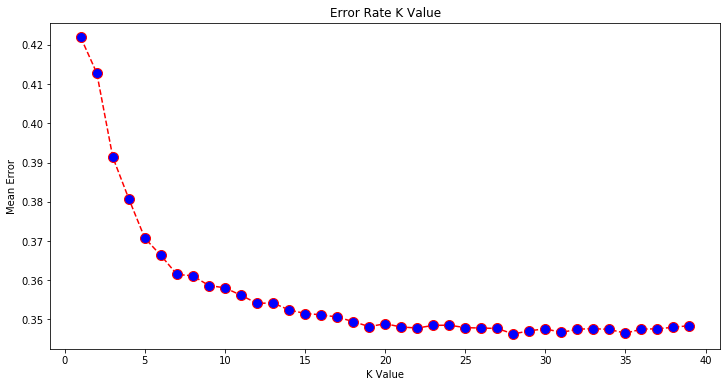

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### Training and Predictions con K=28

In [57]:
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [58]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1696  3129   119]
 [ 1288 24337  4054]
 [  108  9352  8038]]
              precision    recall  f1-score   support

           1       0.55      0.34      0.42      4944
           2       0.66      0.82      0.73     29679
           3       0.66      0.46      0.54     17498

    accuracy                           0.65     52121
   macro avg       0.62      0.54      0.57     52121
weighted avg       0.65      0.65      0.64     52121

0.6536904510657893


#### KNN - FE3

In [60]:
#Realizamos One-Hot Encoding de los datos de tipo category y object
KNN_train = pd.get_dummies(df_train_values)
KNN_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   has_superstructure_adobe_mud            260601 non-null  int64
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64
 10  has_superstructure_stone_flag           260601 non-null  int64
 11  

In [61]:
#Seleccionamos los features
selected_features = ['building_id',
                      'geo_level_1_id',
#                       'geo_level_2_id',
#                       'geo_level_3_id',
                       'age',
                       'area_percentage',
                       'height_percentage']
#                       'has_superstructure_cement_mortar_stone',
 #                      'foundation_type_r',
  #                     'ground_floor_type_v',
   #                    'count_floors_pre_eq',
    #                   'has_superstructure_mud_mortar_brick',
     #                  'roof_type_x']
    #                   'count_families',
     #                  'foundation_type_i',
      #                 'has_superstructure_timber'   ]



KNN_train_subset = KNN_train[selected_features]

In [62]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   building_id        260601 non-null  int64
 1   geo_level_1_id     260601 non-null  int64
 2   age                260601 non-null  int64
 3   area_percentage    260601 non-null  int64
 4   height_percentage  260601 non-null  int64
dtypes: int64(5)
memory usage: 9.9 MB


In [63]:
# Agregamos labels
KNN_train_subset = KNN_train_subset.merge(df_train_labels)

# Quitamos el feature 'building_id'
KNN_train_subset = KNN_train_subset.iloc[:,1:]

In [64]:
KNN_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   geo_level_1_id     260601 non-null  int64
 1   age                260601 non-null  int64
 2   area_percentage    260601 non-null  int64
 3   height_percentage  260601 non-null  int64
 4   damage_grade       260601 non-null  int64
dtypes: int64(5)
memory usage: 11.9 MB


In [65]:
X = KNN_train_subset.iloc[:, :-1].values
y = KNN_train_subset.iloc[:, -1].values

#### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1666  3066   282]
 [ 2151 21468  6040]
 [  404  8421  8623]]
              precision    recall  f1-score   support

           1       0.39      0.33      0.36      5014
           2       0.65      0.72      0.69     29659
           3       0.58      0.49      0.53     17448

    accuracy                           0.61     52121
   macro avg       0.54      0.52      0.53     52121
weighted avg       0.60      0.61      0.60     52121

0.6092937587536693


#### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [71]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

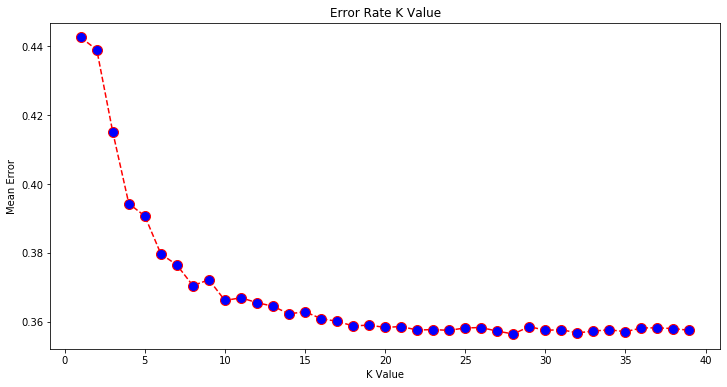

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### Training and Predictions con K=28

In [73]:
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [74]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1174  3665   175]
 [  890 24627  4142]
 [  142  9565  7741]]
              precision    recall  f1-score   support

           1       0.53      0.23      0.33      5014
           2       0.65      0.83      0.73     29659
           3       0.64      0.44      0.52     17448

    accuracy                           0.64     52121
   macro avg       0.61      0.50      0.53     52121
weighted avg       0.64      0.64      0.62     52121

0.6435409911551966


### Reducción de dimensiones - PCA

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

KNN_train = pd.get_dummies(df_train_values)

#Seleccionamos los features
selected_features = [
                      'geo_level_1_id',
                       'geo_level_2_id',
                       'geo_level_3_id',
                       'age',
                       'area_percentage',
                       'height_percentage',
                       'has_superstructure_cement_mortar_stone',
                       'foundation_type_r',
                       'ground_floor_type_v',
                       'count_floors_pre_eq',
                       'has_superstructure_mud_mortar_brick',
                       'roof_type_x',
                       'count_families',
                       'foundation_type_i',
                       'has_superstructure_timber'   ]

X = KNN_train[selected_features]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   age                                     260601 non-null  int64
 4   area_percentage                         260601 non-null  int64
 5   height_percentage                       260601 non-null  int64
 6   has_superstructure_cement_mortar_stone  260601 non-null  int64
 7   foundation_type_r                       260601 non-null  uint8
 8   ground_floor_type_v                     260601 non-null  uint8
 9   count_floors_pre_eq                     260601 non-null  int64
 10  has_superstructure_mud_mortar_brick     260601 non-null  int64
 11  

In [5]:


#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)



In [6]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00000384e+00 -6.14050891e-02  2.71845556e-03 -3.90764996e-03
   7.11584233e-02 -6.34742978e-02  2.36563028e-02 -1.88061378e-01
   1.10562927e-01 -8.93639223e-02 -2.88537905e-02  4.82724811e-02
   3.51084618e-02  3.36227036e-03  1.44985903e-01]
 [-6.14050891e-02  1.00000384e+00  9.21096664e-04  1.25938889e-02
  -4.94434748e-02  3.55165255e-02 -9.12168942e-03  9.79808143e-02
  -7.82791858e-02  4.77298776e-02  1.42456919e-02 -6.71521102e-02
  -1.24390965e-02 -4.48934636e-02 -2.39269760e-02]
 [ 2.71845556e-03  9.21096664e-04  1.00000384e+00 -6.38461163e-03
  -5.64266425e-03 -2.45068612e-02  5.96634383e-03  1.45593717e-03
  -4.32494149e-03 -2.16463991e-02 -2.32785432e-02 -1.46348644e-02
  -2.47861992e-03 -1.04942246e-02 -3.91604833e-03]
 [-3.90764996e-03  1.25938889e-02 -6.38461163e-03  1.00000384e+00
  -4.32252785e-03  6.10737836e-02 -1.21279688e-02  7.26399885e-02
  -5.23421466e-02  8.66683634e-02  7.95257478e-02 -4.00872716e-02
   5.30930109e-03 -4.88601808

In [7]:


#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[-0.07951952 -0.15827053  0.00140971 -0.02060204  0.0850613   0.14948831
  -0.57882808 -0.20531666 -0.70079202 -0.09971998  0.06222954 -0.22483996
  -0.02098304  0.03621183 -0.06473762]
 [ 0.07155455  0.08738269 -0.00519896  0.01208066 -0.01266251 -0.03814194
   0.21793882  0.01807313 -0.02803296 -0.11563263 -0.29555235 -0.78073304
   0.26422266 -0.32577053  0.22503346]
 [ 0.00966427 -0.03648097  0.00234993  0.00420817  0.00381973  0.00684253
   0.03098001 -0.01155795  0.0448601  -0.0636517   0.15424142 -0.03806567
   0.82279214  0.47528565 -0.25141803]
 [ 0.04442105  0.13506138  0.01043671 -0.00397292  0.00217703 -0.02997678
  -0.11221153 -0.02432404  0.0634943   0.3063154  -0.24647406 -0.21167952
  -0.21493303  0.72099478  0.4428612 ]
 [-0.30167179  0.12555372 -0.04562648 -0.0364776   0.07336045 -0.13760138
  -0.09038964  0.85831944 -0.15186778 -0.07092124  0.25500123 -0.05849452
   0.00901282  0.02696454  0.15254628]
 [-0.13474982  0.5980874   0.70034791  0.01585671 -

In [8]:


#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])



Autovalores en orden descendiente:
3.0156935536695677
2.0184595040787174
1.2240234888253834
1.0299155243402158
1.0045517009618483
0.9875123373217625
0.9729347916093906
0.9573249424898564
0.8690351200277142
0.831123134585214
0.7528745639374084
0.4741044004741984
0.3893593202978395
0.261962622534303
0.21118255432473085


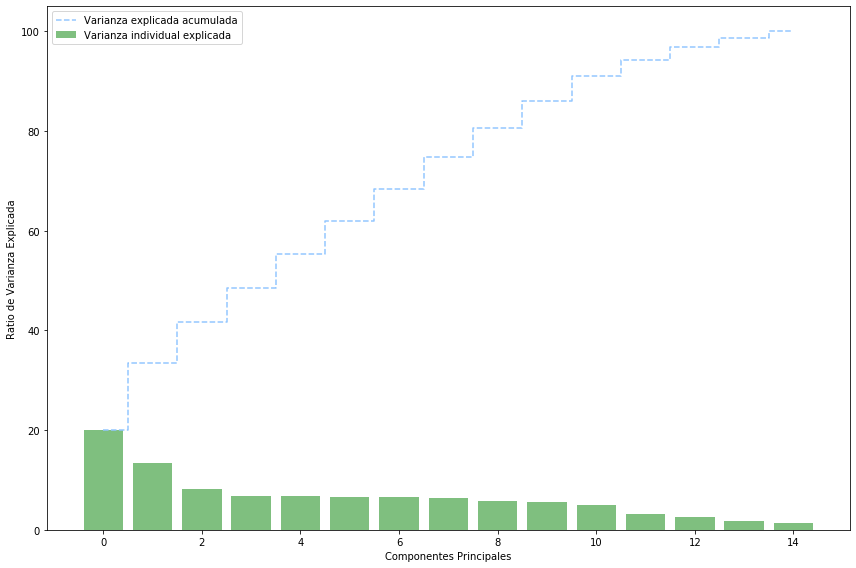

In [14]:


# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 8))

    plt.bar(range(15), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(15), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()



In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   age                                     260601 non-null  int64
 4   area_percentage                         260601 non-null  int64
 5   height_percentage                       260601 non-null  int64
 6   has_superstructure_cement_mortar_stone  260601 non-null  int64
 7   foundation_type_r                       260601 non-null  uint8
 8   ground_floor_type_v                     260601 non-null  uint8
 9   count_floors_pre_eq                     260601 non-null  int64
 10  has_superstructure_mud_mortar_brick     260601 non-null  int64
 11  

In [27]:
#normalizamos los datos
scaler=StandardScaler()
scaler.fit(X) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(X)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=10) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [28]:
X = X_pca
y = df_train_labels.iloc[:, -1].values

#### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 2314  2463   196]
 [ 1866 22530  5253]
 [  306  7211  9982]]
              precision    recall  f1-score   support

           1       0.52      0.47      0.49      4973
           2       0.70      0.76      0.73     29649
           3       0.65      0.57      0.61     17499

    accuracy                           0.67     52121
   macro avg       0.62      0.60      0.61     52121
weighted avg       0.66      0.67      0.66     52121

0.6681759751347826


#### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [34]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

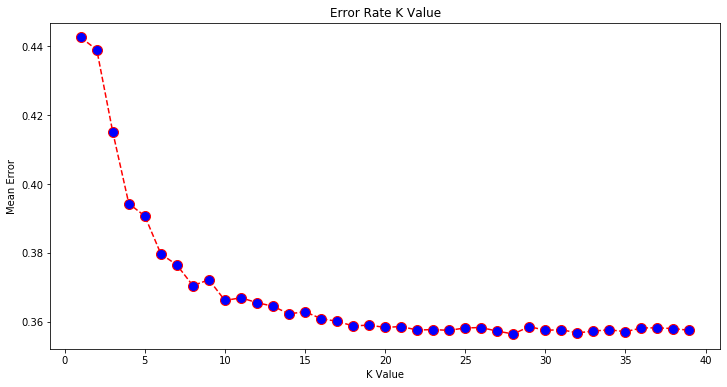

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### Training and Predictions con K=28

In [40]:
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [41]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[ 1876  2893   204]
 [ 1183 24264  4202]
 [  119  8783  8597]]
              precision    recall  f1-score   support

           1       0.59      0.38      0.46      4973
           2       0.68      0.82      0.74     29649
           3       0.66      0.49      0.56     17499

    accuracy                           0.67     52121
   macro avg       0.64      0.56      0.59     52121
weighted avg       0.66      0.67      0.65     52121

0.6664684100458549


### Competencia: Predict and Submit

In [43]:
test_values = pd.read_csv('./../datasets/test_values.csv')

#### Pre_procesamiento del set de test (competencia)

In [44]:
KNN_test = pd.get_dummies(test_values)

#Seleccionamos los features
selected_features = [
                      'geo_level_1_id',
                       'geo_level_2_id',
                       'geo_level_3_id',
                       'age',
                       'area_percentage',
                       'height_percentage',
                       'has_superstructure_cement_mortar_stone',
                       'foundation_type_r',
                       'ground_floor_type_v',
                       'count_floors_pre_eq',
                       'has_superstructure_mud_mortar_brick',
                       'roof_type_x',
                       'count_families',
                       'foundation_type_i',
                       'has_superstructure_timber'   ]

X = KNN_test[selected_features]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   geo_level_1_id                          86868 non-null  int64
 1   geo_level_2_id                          86868 non-null  int64
 2   geo_level_3_id                          86868 non-null  int64
 3   age                                     86868 non-null  int64
 4   area_percentage                         86868 non-null  int64
 5   height_percentage                       86868 non-null  int64
 6   has_superstructure_cement_mortar_stone  86868 non-null  int64
 7   foundation_type_r                       86868 non-null  uint8
 8   ground_floor_type_v                     86868 non-null  uint8
 9   count_floors_pre_eq                     86868 non-null  int64
 10  has_superstructure_mud_mortar_brick     86868 non-null  int64
 11  roof_type_x    

In [45]:
#normalizamos los datos
scaler=StandardScaler()
scaler.fit(X) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(X)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=10) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

#### Predictions

In [46]:
y_pred = classifier.predict(X_pca)

In [47]:
submission_format = pd.read_csv('./../datasets/submission_format.csv', index_col='building_id')

In [48]:
our_submission2 = pd.DataFrame(data=y_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [49]:
our_submission2.head(2)

,damage_grade
building_id,
300051,3
99355,2


In [51]:
our_submission2.to_csv('submission_KNN_2.csv')

In [52]:
!head submission_KNN_2.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,2
421793,3
871976,2
691228,2
896100,2
343471,3


#### Resultado del Submit 0.5812, bajo con respecto al train_test que fue 0.6664, pero mejoró al seleccionar mejor los features. (Submit anterior 0.4593 y train_test 0.7006)